In [1]:
import pandas as pd

In [ ]:
order_id	product_id	add_to_cart_order	reordered	product_name	aisle_id	department_id	user_id	eval_set	order_number	order_dow	order_hour_of_day	days_since_prior_order	aisle	department	user_total_orders	order_size
SURYA
8:25 PM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# Build a better neural network - i added with layers
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dens
SURYA
8:27 PM
#Total Orders per User

user_total_orders = final_df.groupby('user_id')['order_number'].max().reset_index(name='user_total_orders')
final_df = final_df.merge(user_total_orders, on='user_id', how='left')
#Total Products per Order

order_size = final_df.groupby('order_id')['product_id'].count().reset_index(name='order_size')
final_df = final_df.merge(order_size, on='order_id', how='left')
#Reorder Rate per Product

product_reorder_rate = final_df.groupby('product_id')['reordered'].mean().reset_index(name='product_reorder_rate')
final_df = final_df.merge(product_reorder_rate, on='product_id', how='left')
#Reorder Ratio per User

user_reorder_ratio = final_df.groupby('user_id')['reordered'].mean().reset_index(name='user_reorder_ratio')
final_df = final_df.merge(user_reorder_ratio, on='user_id', how='left')
SURYA
8:28 PM
#Hour & Day Based Features

final_df['is_weekend'] = final_df['order_dow'].apply(lambda x: 1 if x in [0, 6] else 0)
final_df['is_morning_order'] = final_df['order_hour_of_day'].apply(lambda x: 1 if 5 <= x <= 11 else 0)
# User-Product Interaction Count

user_product_orders = final_df.groupby(['user_id', 'product_id']).size().reset_index(name='user_product_order_count')
final_df = final_df.merge(user_product_orders, on=['user_id', 'product_id'], how='left')
final_df = final_df.drop(columns=["product_name","eval_set","aisle","department"])
#step1 
import numpy as np
      final_df['skewed_column'] = np.log1p(final_df['skewed_column'])
import numpy as np
      final_df['skewed_column'] = np.log1p(final_df['skewed_column'])
from scipy import stats
      final_df['skewed_column'], _ = stats.boxcox(final_df['skewed_column'])


In [2]:
import pandas as pd

In [3]:
fg = pd.read_csv("aisles.csv")
dept= pd.read_csv("departments.csv")
orders=pd.read_csv("order_products__prior.csv")
or_train=pd.read_csv("order_products__train.csv")
dept.columns


Index(['department_id', 'department'], dtype='object')

In [25]:
fg.columns


Index(['aisle_id', 'aisle'], dtype='object')

In [26]:
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [29]:
or_train.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [4]:
o=pd.read_csv("orders.csv")
p=pd.read_csv("products.csv")
o.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [31]:
p.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [5]:
df1=pd.merge(dept,p,on="department_id")
df1.columns

Index(['department_id', 'department', 'product_id', 'product_name',
       'aisle_id'],
      dtype='object')

In [6]:
df2=pd.merge(df1,fg,on="aisle_id")
df2.columns

Index(['department_id', 'department', 'product_id', 'product_name', 'aisle_id',
       'aisle'],
      dtype='object')

In [7]:
df3=pd.merge(or_train,o,on="order_id")
df3.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [72]:
df=pd.merge(df3,df2,on="product_id")
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'department_id', 'department', 'product_name',
       'aisle_id', 'aisle'],
      dtype='object')

In [73]:
user_total_orders = df.groupby('user_id')['order_number'].max().reset_index(name='user_total_orders')
df = df.merge(user_total_orders, on='user_id', how='left')
#Total Products per Order

order_size = df.groupby('order_id')['product_id'].count().reset_index(name='order_size')
df = df.merge(order_size, on='order_id', how='left')
#Reorder Rate per Product

product_reorder_rate = df.groupby('product_id')['reordered'].mean().reset_index(name='product_reorder_rate')
df = df.merge(product_reorder_rate, on='product_id', how='left')
#Reorder Ratio per User

user_reorder_ratio = df.groupby('user_id')['reordered'].mean().reset_index(name='user_reorder_ratio')
df = df.merge(user_reorder_ratio, on='user_id', how='left')
#Hour & Day Based Features

df['is_weekend'] = df['order_dow'].apply(lambda x: 1 if x in [0, 6] else 0)
df['is_morning_order'] = df['order_hour_of_day'].apply(lambda x: 1 if 5 <= x <= 11 else 0)
# User-Product Interaction Count

user_product_orders = df.groupby(['user_id', 'product_id']).size().reset_index(name='user_product_order_count')
df = df.merge(user_product_orders, on=['user_id', 'product_id'], how='left')
df = df.drop(columns=["product_name","eval_set","aisle","department"])


In [74]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
df["days_since_prior_order"]=st.fit_transform(df[["days_since_prior_order"]])

In [75]:
df["days_since_prior_order"].skew()

np.float64(0.07489124599013251)

In [76]:
df["order_dow"].skew()

np.float64(0.17551589569503284)

Skewness after Yeo-Johnson on order_hour_of_day: -0.007962841369591422


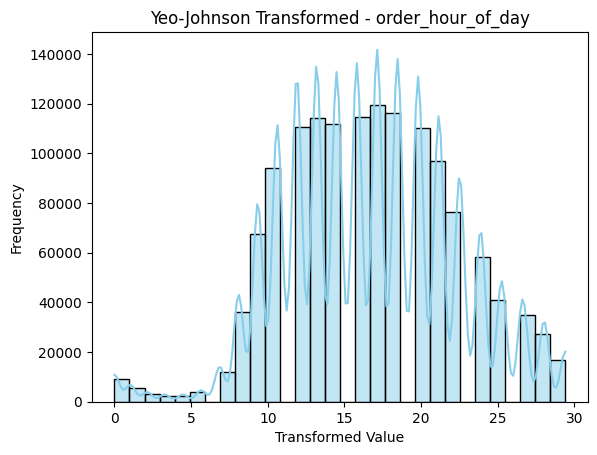

In [77]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Yeo-Johnson transformation on 'order_hour_of_day'
yeojohnson_transformed, fitted_lambda_yeo = stats.yeojohnson(df["order_hour_of_day"])
df["order_hour_of_day"] = yeojohnson_transformed

# Calculate skewness after transformation
yeojohnson_skew = stats.skew(yeojohnson_transformed)
print(f"Skewness after Yeo-Johnson on order_hour_of_day: {yeojohnson_skew}")

# Plot transformed data
sns.histplot(df["order_hour_of_day"], kde=True, bins=30, color='skyblue')
plt.title("Yeo-Johnson Transformed - order_hour_of_day")
plt.xlabel("Transformed Value")
plt.ylabel("Frequency")
plt.show()


In [78]:
from scipy import stats

# Applying Box-Cox Transformation
df['order_number'], _ = stats.boxcox(df['order_number'] + 1)  # Adding 1 if data has 0s
df["order_number"].skew()

np.float64(0.10627814282479646)

Skewness: -0.12102968272420958


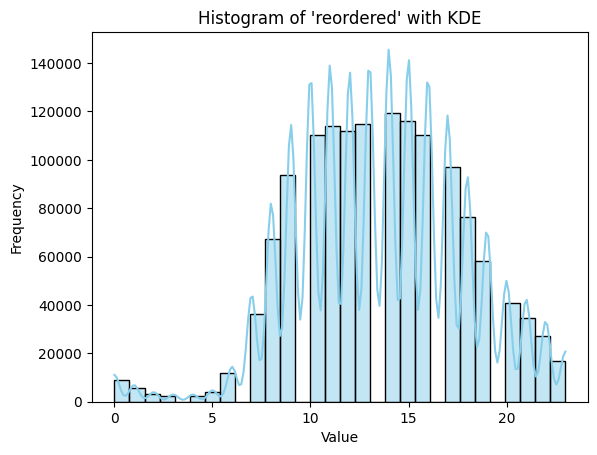

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Check skew value
print("Skewness:", skew(df["order_hour_of_day"]))

# Plot histogram with KDE (bell curve)
sns.histplot(df["order_hour_of_day"], kde=True, bins=30, color='skyblue')
plt.title("Histogram of 'reordered' with KDE")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


Skewness after Box-Cox Transformation: -0.14977238361491862


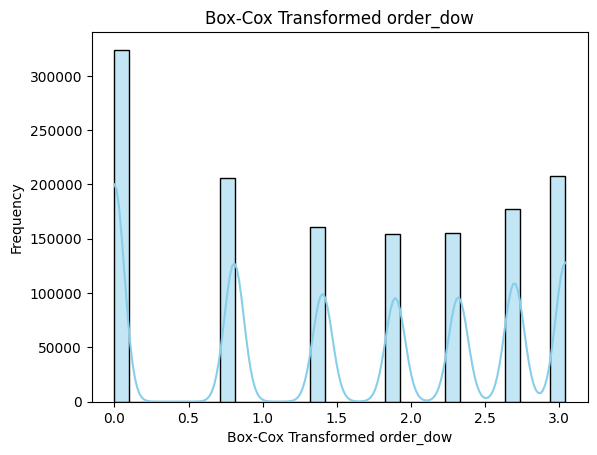

In [79]:
from scipy import stats

# Box-Cox transformation (only works for positive values)
df['order_dow'], _ = stats.boxcox(df['order_dow'] + 1)  # Add 1 if there are zero values

# Check skewness
print("Skewness after Box-Cox Transformation:", df['order_dow'].skew())

# Visualize
sns.histplot(df['order_dow'], kde=True, bins=30, color='skyblue')
plt.title("Box-Cox Transformed order_dow")
plt.xlabel("Box-Cox Transformed order_dow")
plt.ylabel("Frequency")
plt.show()


In [80]:
import numpy as np

# Apply log1p to handle zero values (log1p = log(x + 1))
df["add_to_cart_order"] = np.log1p(df["add_to_cart_order"])


In [67]:
df['order_number'] = 1 / (df['order_number'] + 1) 

In [82]:
df["add_to_cart_order"].skew()

np.float64(-0.05042957980112142)

In [81]:
df["order_number"].skew()

np.float64(0.10627814282479646)

In [83]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'department_id', 'aisle_id',
       'user_total_orders', 'order_size', 'product_reorder_rate',
       'user_reorder_ratio', 'is_weekend', 'is_morning_order',
       'user_product_order_count'],
      dtype='object')

In [85]:
X = df.drop(columns=['reordered'], axis=1)
y = df['reordered']


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [87]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))


model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.summary()


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,617 (186.00 KB)

 Trainable params: 46,721 (182.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [91]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2,
                    class_weight=class_weights_dict,
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/50
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7941 - loss: 0.4216 - val_accuracy: 0.7940 - val_loss: 0.4205
Epoch 2/50
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.7944 - loss: 0.4217 - val_accuracy: 0.7969 - val_loss: 0.4160
Epoch 3/50
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.7943 - loss: 0.4214 - val_accuracy: 0.7954 - val_loss: 0.4196
Epoch 4/50
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7943 - loss: 0.4211 - val_accuracy: 0.7943 - val_loss: 0.4210
Epoch 5/50
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.7948 - loss: 0.4209 - val_accuracy: 0.7976 - val_loss: 0.4155
Epoch 6/50
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.7950 - loss: 0.4208 - val_accuracy: 0.7975 - val_loss: 0.4167
Epoch 7/50
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7944 - loss: 0.4216 - val_accuracy: 0.7964 - val_loss: 0.4178
Epoch 8/50
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.7933 -

In [92]:
result = pd.DataFrame(history.history)
result

,accuracy,loss,val_accuracy,val_loss
0,0.794010,0.421598,0.794005,0.420492
1,0.794394,0.421536,0.796875,0.415973
2,0.794322,0.421489,0.795395,0.419607
3,0.794221,0.421318,0.794321,0.421039
4,0.794105,0.421410,0.797620,0.415477
5,0.794441,0.421146,0.797530,0.416743
6,0.794642,0.420983,0.796415,0.417781
7,0.794163,0.421075,0.794244,0.419503
8,0.794201,0.420737,0.796402,0.416390
9,0.794377,0.420526,0.795905,0.417934
